## Forcasting Stock Performance in Our Diversified Energy Stocks Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.


### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 10 Year's Worth of Traditional Energy Stock Price Data via Alpaca API Call

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['BAM', 'COP', 'ETN', 'NEE', 'OKE', 'PXD']

# Get 10 year's worth of historical price data
Diver_energy = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
Diver_energy.head()

BAM                                  COP         \
                            open   high    low  close   volume   open   high   
time                                                                           
2019-08-09 00:00:00-04:00  50.27  51.03  50.12  50.88  1654827  54.96  55.47   
2019-08-12 00:00:00-04:00  50.79  51.16  50.49  50.53  1286362  53.79  53.93   
2019-08-13 00:00:00-04:00  50.38  51.14  50.23  51.04  1755703  52.84  54.83   
2019-08-14 00:00:00-04:00  50.43  50.67  49.72  49.75  1954272  52.46  52.86   
2019-08-15 00:00:00-04:00  49.90  50.29  49.70  50.05  1380392  51.40  52.01   

                                                  ...    OKE                  \
                             low  close   volume  ...   open   high      low   
time                                              ...                          
2019-08-09 00:00:00-04:00  53.98  54.01  4242757  ...  69.05  69.96  68.7100   
2019-08-12 00:00:00-04:00  52.85  53.12  3227790  ...  69.75  70.35  68.8901   
2019-08-13 00:00:00-04:00  52.44  53.87  5261949  ...  69.16  69.81  68.7800   
2019-08-14 00:00:00-04:00  51.52  51.79  5289817  ...  68.67  69.01  67.5200   
2019-08-15 00:00:00-04:00  50.59  50.91  5340355  ...  67.64  68.59  67.5600   

                                              PXD                           \
                           close   volume    open     high     low   close   
time                                                                         
2019-08-09 00:00:00-04:00  69.05  1449402  126.00  127.885  124.91  126.24   
2019-08-12 00:00:00-04:00  69.22  1787116  125.39  127.780  124.21  126.79   
2019-08-13 00:00:00-04:00  69.64  1782290  125.56  129.570  125.08  128.38   
2019-08-14 00:00:00-04:00  67.69  1733213  125.34  126.370  122.50  122.72   
2019-08-15 00:00:00-04:00  67.98  1124976  122.56  123.650  120.93  122.97   

                                    
                            volume  
time                                
2019-08-09 00:00:00-04:00  1232772  
2019-08-12 00:00:00-04:00  1426932  
2019-08-13 00:00:00-04:00  1560585  
2019-08-14 00:00:00-04:00  1641303  
2019-08-15 00:00:00-04:00  1060414  

[5 rows x 30 columns]

### The MCForecastTools Library at a Glance

In [5]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate 10 year portfolio growth using Monte Carlo simulation

In [6]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns WEIGHTED BY Market Capital
Diver_energy_MC_10_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.17, 0.17, 0.13, 0.41, 0.05, 0.08],
    num_simulation = 100,
    num_trading_days = 252*10)

In [7]:
# Printing the simulation input data
Diver_energy_MC_10_years.portfolio_data

BAM                                               \
                            open    high     low  close   volume daily_return   
time                                                                            
2019-08-09 00:00:00-04:00  50.27  51.030  50.120  50.88  1654827          NaN   
2019-08-12 00:00:00-04:00  50.79  51.160  50.490  50.53  1286362    -0.006879   
2019-08-13 00:00:00-04:00  50.38  51.140  50.230  51.04  1755703     0.010093   
2019-08-14 00:00:00-04:00  50.43  50.670  49.720  49.75  1954272    -0.025274   
2019-08-15 00:00:00-04:00  49.90  50.290  49.700  50.05  1380392     0.006030   
...                          ...     ...     ...    ...      ...          ...   
2019-12-24 00:00:00-05:00  57.57  57.670  57.120  57.63   529054     0.000521   
2019-12-26 00:00:00-05:00  57.77  58.000  57.550  57.92   451673     0.005032   
2019-12-27 00:00:00-05:00  58.20  58.230  57.740  58.08   695811     0.002762   
2019-12-30 00:00:00-05:00  58.08  58.130  57.610  57.82   853124    -0.004477   
2019-12-31 00:00:00-05:00  57.82  57.935  57.525  57.81  1000189    -0.000173   

                             COP                         ...      OKE         \
                            open     high    low  close  ...      low  close   
time                                                     ...                   
2019-08-09 00:00:00-04:00  54.96  55.4700  53.98  54.01  ...  68.7100  69.05   
2019-08-12 00:00:00-04:00  53.79  53.9300  52.85  53.12  ...  68.8901  69.22   
2019-08-13 00:00:00-04:00  52.84  54.8300  52.44  53.87  ...  68.7800  69.64   
2019-08-14 00:00:00-04:00  52.46  52.8600  51.52  51.79  ...  67.5200  67.69   
2019-08-15 00:00:00-04:00  51.40  52.0100  50.59  50.91  ...  67.5600  67.98   
...                          ...      ...    ...    ...  ...      ...    ...   
2019-12-24 00:00:00-05:00  64.76  65.5100  64.61  64.71  ...  75.5300  75.60   
2019-12-26 00:00:00-05:00  65.09  65.7359  64.85  65.03  ...  75.3000  76.14   
2019-12-27 00:00:00-05:00  65.20  65.6300  64.61  65.01  ...  75.6800  75.73   
2019-12-30 00:00:00-05:00  65.07  65.2500  64.53  64.62  ...  75.1200  75.41   
2019-12-31 00:00:00-05:00  64.15  65.1700  63.90  65.01  ...  74.7300  75.66   

                                                    PXD                   \
                            volume daily_return    open     high     low   
time                                                                       
2019-08-09 00:00:00-04:00  1449402          NaN  126.00  127.885  124.91   
2019-08-12 00:00:00-04:00  1787116     0.002462  125.39  127.780  124.21   
2019-08-13 00:00:00-04:00  1782290     0.006068  125.56  129.570  125.08   
2019-08-14 00:00:00-04:00  1733213    -0.028001  125.34  126.370  122.50   
2019-08-15 00:00:00-04:00  1124976     0.004284  122.56  123.650  120.93   
...                            ...          ...     ...      ...     ...   
2019-12-24 00:00:00-05:00   558519    -0.004870  151.40  152.060  151.05   
2019-12-26 00:00:00-05:00   948659     0.007143  152.58  153.400  151.76   
2019-12-27 00:00:00-05:00  1037421    -0.005385  153.27  153.270  151.70   
2019-12-30 00:00:00-05:00   871781    -0.004226  150.90  152.200  150.25   
2019-12-31 00:00:00-05:00  1116213     0.003315  150.00  151.570  149.16   

                                                         
                            close   volume daily_return  
time                                                     
2019-08-09 00:00:00-04:00  126.24  1232772          NaN  
2019-08-12 00:00:00-04:00  126.79  1426932     0.004357  
2019-08-13 00:00:00-04:00  128.38  1560585     0.012540  
2019-08-14 00:00:00-04:00  122.72  1641303    -0.044088  
2019-08-15 00:00:00-04:00  122.97  1060414     0.002037  
...                           ...      ...          ...  
2019-12-24 00:00:00-05:00  151.80   347823     0.005564  
2019-12-26 00:00:00-05:00  152.12   700815     0.002108  
2019-12-27 00:00:00-05:00  151.84   778671    -0.001841  
2019-12-30 0

In [8]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
Diver_energy_MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995657,1.006899,0.998707,1.001277,1.001170,0.990227,1.000701,1.003124,0.995290,0.998119,...,1.003749,1.000095,1.012951,1.004585,1.000573,1.007099,1.009112,1.002764,1.009321,1.000687
2,0.999911,1.006596,0.992918,1.014385,0.994822,0.988261,1.001853,1.006570,1.004292,1.001182,...,1.012775,1.017253,1.005407,1.024178,1.007275,1.004453,1.008323,1.000508,1.018988,1.005747
3,1.007463,1.006336,0.996197,1.016819,0.998681,0.984490,1.004654,1.011958,1.003771,1.009491,...,1.012408,1.021162,0.998316,1.040891,1.016218,1.004662,1.010073,1.001969,1.028699,0.999035
4,1.013414,1.006906,1.000213,1.003912,0.998376,0.979827,1.008850,1.014171,1.006582,1.004415,...,1.011044,1.008467,0.987479,1.033966,1.014964,1.002704,1.023045,1.000343,1.028826,0.999240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,68.869966,45.882033,100.326782,43.546074,58.651586,50.890088,38.417934,62.843857,50.416807,36.662950,...,39.021224,69.805565,42.021873,36.592327,29.095467,34.605285,48.475110,105.933984,58.296215,37.041552
2517,68.453479,46.048119,100.113782,43.442164,58.748525,50.930068,38.240346,62.821327,50.671424,36.905048,...,39.052226,69.628744,42.052551,36.558830,29.200483,34.399109,48.605703,106.035534,58.120079,36.965701
2518,68.351047,45.535707,100.063762,43.081250,58.364093,51.160336,38.311527,63.330322,50.925790,37.096164,...,39.304836,69.486220,42.126095,36.675372,29.147197,34.600624,48.537994,105.613508,57.842963,37.032411
2519,68.984318,45.352897,99.969627,43.352149,58.272940,51.154576,38.240181,63.592964,51.223618,37.308047,...,39.141911,69.488530,42.136417,36.785554,29.155727,34.807830,48.565742,106.060671,57.834311,37.105372


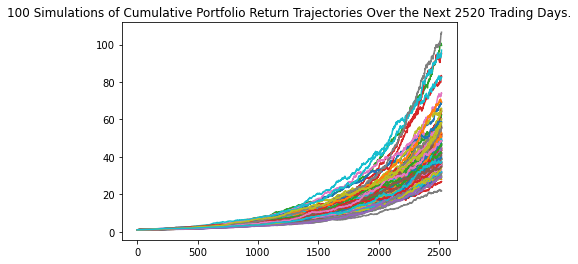

In [9]:
# Plot simulation outcomes
line_plot_Diver_energy_MC_10_years = Diver_energy_MC_10_years.plot_simulation()

# Save the plot for future usage
line_plot_Diver_energy_MC_10_years.get_figure().savefig("Diver_energy_MC_10_years_sim_plot.png", bbox_inches="tight")

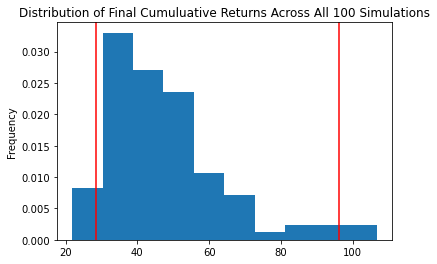

In [10]:
# Plot probability distribution and confidence intervals
dist_plot_Diver_energy_MC_10_years = Diver_energy_MC_10_years.plot_distribution()

# Save the plot for future usage
dist_plot_Diver_energy_MC_10_years.get_figure().savefig('Diver_energy_MC_10_years_dist_plot.png',bbox_inches='tight')

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
tbldivMC = Diver_energy_MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbldivMC)

count           100.000000
mean             47.708224
std              16.014689
min              21.838993
25%              36.813432
50%              44.544506
75%              53.371677
max             106.635859
95% CI Lower     28.455445
95% CI Upper     96.177158
Name: 2520, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_MC_10_years_lower = round(tbldivMC[8]*10000,2)
ci_Diver_energy_MC_10_years_upper = round(tbldivMC[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_Diver_energy_MC_10_years_lower} and ${ci_Diver_energy_MC_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $284554.45 and $961771.58


#### WEIGHTED BY Dividend Yield

In [13]:
# Configuring a Monte Carlo simulation to forecast ten years cumulative returns WEIGHTED BY Dividend Yield
Diver_energy_DY_10_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.06, 0.19, 0.12, 0.10, 0.44, 0.09],
    num_simulation = 100,
    num_trading_days = 252*10)

In [14]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Diver_energy_DY_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006313,1.007954,1.000615,1.009771,0.999749,1.007935,1.001392,1.011173,0.998705,0.999534,...,1.003984,0.987704,1.004396,1.004289,1.005648,0.999499,1.001667,1.007359,1.000214,0.997712
2,1.006316,1.012109,1.007407,1.007388,0.997279,1.004142,1.007170,1.018750,0.988054,0.996336,...,0.998560,0.998010,1.001522,1.008938,1.017521,1.001461,1.007158,1.014038,1.002438,1.005894
3,1.010280,1.024826,1.009587,1.003378,0.999245,1.001565,1.006657,1.007546,0.981169,1.004949,...,0.996441,0.994996,1.007279,1.002594,1.024319,1.005828,1.008473,1.019153,0.994698,1.010968
4,1.020026,1.026299,1.008621,1.010152,1.002235,1.007345,0.997271,1.001092,0.991216,1.013530,...,0.990721,1.003813,0.996620,0.998739,1.031920,1.013636,1.005554,1.020568,0.996132,1.008322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,27.927175,31.679365,37.086095,38.569008,41.711063,51.953800,23.351737,28.142570,80.802399,43.741188,...,44.891596,25.583346,43.130521,53.639582,45.650752,36.212773,70.582077,31.165612,48.992413,35.290081
2517,27.848009,32.065909,37.359760,39.125605,41.964859,51.786205,23.039092,28.154803,80.947307,43.606625,...,45.037277,25.461568,43.237164,53.269308,46.116156,36.472173,70.682407,31.353230,49.335895,35.143887
2518,27.811024,31.747303,37.422103,38.960681,42.161690,52.242319,22.979908,27.990728,80.219845,43.897265,...,45.397414,25.391040,42.949512,53.234198,46.004628,36.781457,70.739462,31.610694,49.853097,35.465008
2519,28.335772,31.703531,37.538160,38.910401,42.245895,51.984539,23.394726,27.848811,81.165762,44.046869,...,45.729002,24.848842,43.117062,53.359375,45.444088,36.647528,70.333396,31.303034,50.447468,35.491975


In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
tbldivDY = Diver_energy_DY_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbldivDY)

count           100.000000
mean             38.174728
std              13.032498
min              17.029899
25%              28.421908
50%              36.551769
75%              45.314551
max              83.350865
95% CI Lower     18.906905
95% CI Upper     69.533248
Name: 2520, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_DY_10_years_lower = round(tbldivDY[8]*10000,2)
ci_Diver_energy_DY_10_years_upper = round(tbldivDY[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_Diver_energy_DY_10_years_lower} and ${ci_Diver_energy_DY_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $189069.05 and $695332.48


#### WEIGHTED BY 10 years Return

In [17]:
# Configuring a Monte Carlo simulation to forecast ten years cumulative returns WEIGHTED BY 10 years Return
Diver_energy_Ret_10_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.20, 0.08, 0.15, 0.23, 0.19, 0.15],
    num_simulation = 100,
    num_trading_days = 252*10)

In [18]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Diver_energy_Ret_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996596,1.003892,0.989658,1.007329,1.002551,0.997355,1.004468,1.007350,1.007763,0.988847,...,0.993994,1.000178,0.999950,1.014076,0.992341,0.995237,1.004839,0.998201,0.999234,0.997792
2,0.990770,0.998769,0.978588,1.017806,1.010200,1.004531,1.007190,1.001851,1.011565,1.003239,...,1.001619,0.996501,1.009261,1.011840,0.976398,0.996530,1.007801,1.000401,1.004502,0.999592
3,0.992447,1.001369,0.977240,1.016570,1.021655,0.999791,1.008114,1.007439,1.010113,0.999848,...,0.995713,0.998944,1.003334,1.017717,0.969727,1.001396,1.006262,1.003416,1.008161,0.999249
4,1.002183,1.012865,0.972576,1.016180,1.023638,1.004890,1.015219,1.014641,1.019214,1.001757,...,1.000895,0.996782,1.005050,1.011190,0.969633,1.001350,1.004993,1.008742,1.007271,0.994552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,69.111231,33.619543,67.491196,44.783875,57.444147,37.516381,39.222413,44.822065,66.898851,34.223439,...,29.662888,34.022421,72.636744,26.320714,31.228256,32.019886,45.584306,72.013514,36.825802,44.693485
2517,68.683104,33.630956,67.840265,44.790869,57.292652,37.453337,39.401709,44.597807,67.131093,34.395276,...,29.840355,33.714417,72.599340,26.233882,30.983651,32.209175,45.928088,71.856544,36.881014,45.110988
2518,68.183117,33.663113,67.993382,45.186119,57.133712,37.555549,39.527375,45.087587,66.939716,34.064704,...,30.022738,33.836581,72.941027,26.093677,31.249104,32.638965,45.968822,73.241481,36.972121,45.478752
2519,68.730641,33.483970,67.515915,45.161928,57.562553,37.076312,39.143302,45.096223,67.226615,34.146407,...,29.909392,33.788541,72.925734,26.066336,31.384703,32.664656,46.220949,73.354564,37.370368,45.580881


In [19]:
# Fetch summary statistics from the Monte Carlo simulation results
tbldivRet = Diver_energy_Ret_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbldivRet)

count           100.000000
mean             44.614400
std              14.443003
min              22.953953
25%              33.756320
50%              39.284690
75%              54.244613
max              89.647209
95% CI Lower     26.309164
95% CI Upper     74.551050
Name: 2520, dtype: float64


In [20]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_Ret_10_years_lower = round(tbldivRet[8]*10000,2)
ci_Diver_energy_Ret_10_years_upper = round(tbldivRet[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_Diver_energy_Ret_10_years_lower} and ${ci_Diver_energy_Ret_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $263091.64 and $745510.5


## ---------------------------------------------------------------------

### Get Past 5 Year's Worth of Traditional Energy Stock Price Data via Alpaca API Call

#### WEIGHTED BY MARKET CAPITAL

In [21]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns WEIGHTED BY MARKET CAPITAL
Diver_energy_MC_5_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.17, 0.17, 0.13, 0.41, 0.05, 0.08],
    num_simulation = 100,
    num_trading_days = 252*5)

In [22]:
# Printing the simulation input data
Diver_energy_MC_5_years.portfolio_data

BAM                                               \
                            open    high     low  close   volume daily_return   
time                                                                            
2019-08-09 00:00:00-04:00  50.27  51.030  50.120  50.88  1654827          NaN   
2019-08-12 00:00:00-04:00  50.79  51.160  50.490  50.53  1286362    -0.006879   
2019-08-13 00:00:00-04:00  50.38  51.140  50.230  51.04  1755703     0.010093   
2019-08-14 00:00:00-04:00  50.43  50.670  49.720  49.75  1954272    -0.025274   
2019-08-15 00:00:00-04:00  49.90  50.290  49.700  50.05  1380392     0.006030   
...                          ...     ...     ...    ...      ...          ...   
2019-12-24 00:00:00-05:00  57.57  57.670  57.120  57.63   529054     0.000521   
2019-12-26 00:00:00-05:00  57.77  58.000  57.550  57.92   451673     0.005032   
2019-12-27 00:00:00-05:00  58.20  58.230  57.740  58.08   695811     0.002762   
2019-12-30 00:00:00-05:00  58.08  58.130  57.610  57.82   853124    -0.004477   
2019-12-31 00:00:00-05:00  57.82  57.935  57.525  57.81  1000189    -0.000173   

                             COP                         ...      OKE         \
                            open     high    low  close  ...      low  close   
time                                                     ...                   
2019-08-09 00:00:00-04:00  54.96  55.4700  53.98  54.01  ...  68.7100  69.05   
2019-08-12 00:00:00-04:00  53.79  53.9300  52.85  53.12  ...  68.8901  69.22   
2019-08-13 00:00:00-04:00  52.84  54.8300  52.44  53.87  ...  68.7800  69.64   
2019-08-14 00:00:00-04:00  52.46  52.8600  51.52  51.79  ...  67.5200  67.69   
2019-08-15 00:00:00-04:00  51.40  52.0100  50.59  50.91  ...  67.5600  67.98   
...                          ...      ...    ...    ...  ...      ...    ...   
2019-12-24 00:00:00-05:00  64.76  65.5100  64.61  64.71  ...  75.5300  75.60   
2019-12-26 00:00:00-05:00  65.09  65.7359  64.85  65.03  ...  75.3000  76.14   
2019-12-27 00:00:00-05:00  65.20  65.6300  64.61  65.01  ...  75.6800  75.73   
2019-12-30 00:00:00-05:00  65.07  65.2500  64.53  64.62  ...  75.1200  75.41   
2019-12-31 00:00:00-05:00  64.15  65.1700  63.90  65.01  ...  74.7300  75.66   

                                                    PXD                   \
                            volume daily_return    open     high     low   
time                                                                       
2019-08-09 00:00:00-04:00  1449402          NaN  126.00  127.885  124.91   
2019-08-12 00:00:00-04:00  1787116     0.002462  125.39  127.780  124.21   
2019-08-13 00:00:00-04:00  1782290     0.006068  125.56  129.570  125.08   
2019-08-14 00:00:00-04:00  1733213    -0.028001  125.34  126.370  122.50   
2019-08-15 00:00:00-04:00  1124976     0.004284  122.56  123.650  120.93   
...                            ...          ...     ...      ...     ...   
2019-12-24 00:00:00-05:00   558519    -0.004870  151.40  152.060  151.05   
2019-12-26 00:00:00-05:00   948659     0.007143  152.58  153.400  151.76   
2019-12-27 00:00:00-05:00  1037421    -0.005385  153.27  153.270  151.70   
2019-12-30 00:00:00-05:00   871781    -0.004226  150.90  152.200  150.25   
2019-12-31 00:00:00-05:00  1116213     0.003315  150.00  151.570  149.16   

                                                         
                            close   volume daily_return  
time                                                     
2019-08-09 00:00:00-04:00  126.24  1232772          NaN  
2019-08-12 00:00:00-04:00  126.79  1426932     0.004357  
2019-08-13 00:00:00-04:00  128.38  1560585     0.012540  
2019-08-14 00:00:00-04:00  122.72  1641303    -0.044088  
2019-08-15 00:00:00-04:00  122.97  1060414     0.002037  
...                           ...      ...          ...  
2019-12-24 00:00:00-05:00  151.80   347823     0.005564  
2019-12-26 00:00:00-05:00  152.12   700815     0.002108  
2019-12-27 00:00:00-05:00  151.84   778671    -0.001841  
2019-12-30 0

In [23]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
Diver_energy_MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998501,0.999183,1.002110,1.013668,1.003120,1.013661,0.995217,1.003828,0.998418,1.004858,...,0.996778,1.003158,0.996904,1.007307,1.005365,0.997841,0.997822,1.000116,1.001385,0.993966
2,0.999094,0.999827,1.012378,1.022682,1.004597,1.017375,0.995271,1.003540,0.998047,1.010332,...,0.999598,1.004977,0.996957,1.014575,1.010471,1.005917,0.997016,0.999493,1.009395,0.985079
3,1.003089,1.007014,1.004195,1.024073,1.001046,1.020331,0.999179,0.992242,0.999602,1.008570,...,0.991422,1.012039,0.997648,1.015318,1.010324,1.007283,1.000424,0.993390,1.013643,0.980124
4,0.998685,1.009588,1.005933,1.018116,1.007110,1.023304,0.999425,0.985086,0.990964,1.007566,...,0.991589,1.012196,1.001236,1.022119,1.009279,1.015216,1.006836,0.995579,1.019943,0.975767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.820833,7.150772,6.935748,7.068390,7.376099,7.394440,8.419432,7.492509,5.811408,7.732354,...,8.042634,9.280021,5.899562,5.790711,6.270614,8.294557,6.743695,5.656463,6.111173,5.765690
1257,4.817358,7.203876,6.996645,7.015720,7.345505,7.349325,8.401451,7.499798,5.765612,7.769651,...,8.061538,9.318562,5.902148,5.836867,6.255322,8.278966,6.730090,5.719827,6.125120,5.813645
1258,4.841506,7.165730,7.021040,7.030592,7.348248,7.401929,8.436999,7.535969,5.801912,7.675390,...,8.060750,9.306034,5.864076,5.929317,6.253087,8.296539,6.755477,5.715297,6.135137,5.795140
1259,4.951119,7.213497,7.100126,7.034963,7.442584,7.365256,8.359887,7.554990,5.833309,7.696004,...,8.110804,9.300531,5.861632,5.979323,6.304748,8.286163,6.768748,5.703827,6.186412,5.811888


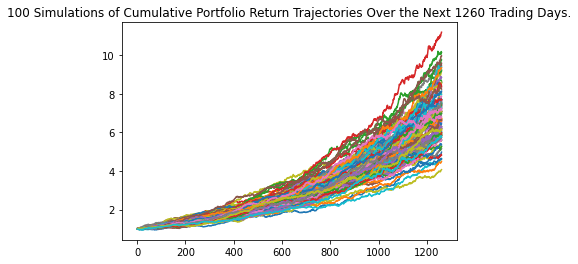

In [24]:
# Plot simulation outcomes
line_plot_Diver_energy_MC_5_years = Diver_energy_MC_5_years.plot_simulation()

# Save the plot for future usage
line_plot_Diver_energy_MC_5_years.get_figure().savefig("Diver_energy_MC_5_years_sim_plot.png", bbox_inches="tight")

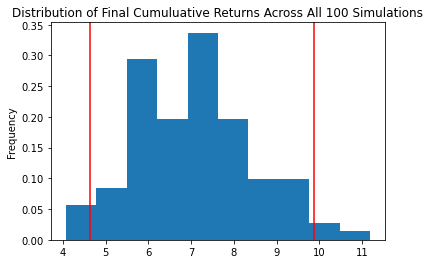

In [25]:
# Plot probability distribution and confidence intervals
dist_plot_Diver_energy_MC_5_years = Diver_energy_MC_5_years.plot_distribution()

# Save the plot for future usage
dist_plot_Diver_energy_MC_5_years.get_figure().savefig('Diver_energy_MC_5_years_dist_plot.png',bbox_inches='tight')

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
tbldiv2 = Diver_energy_MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbldiv2)

count           100.000000
mean              7.065895
std               1.365346
min               4.067920
25%               6.031126
50%               7.092541
75%               7.695972
max              11.188874
95% CI Lower      4.630109
95% CI Upper      9.864924
Name: 1260, dtype: float64


In [27]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_MC_5_years_lower = round(tbldiv2[8]*10000,2)
ci_Diver_energy_MC_5_years_upper = round(tbldiv2[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_Diver_energy_MC_5_years_lower} and ${ci_Diver_energy_MC_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $46301.09 and $98649.24


#### WEIGHTED BY Dividend Yield

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns WEIGHTED BY Dividend Yield
Diver_energy_DY_5_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.06, 0.19, 0.12, 0.10, 0.44, 0.09],
    num_simulation = 100,
    num_trading_days = 252*5)

In [29]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Diver_energy_DY_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987614,1.008960,0.991839,1.002095,0.995324,0.998820,0.988860,0.993978,0.989797,0.995837,...,1.010386,1.003821,0.998292,0.998807,1.001568,1.000588,1.000380,1.004450,1.001100,1.000365
2,0.994798,1.006569,0.991906,1.000829,1.002668,1.013011,0.996168,0.998999,0.994141,0.991694,...,1.026668,0.987941,0.994058,0.996533,1.008949,1.005990,1.000356,0.997853,0.998424,1.013294
3,0.990478,1.009789,0.992078,0.996595,1.004251,1.015569,1.000651,0.997653,1.000415,0.987788,...,1.034376,0.997001,1.000575,1.000667,1.019110,1.006879,1.006245,1.001627,1.003243,1.025527
4,0.991296,1.013048,1.007411,0.994025,1.002321,1.021647,0.985120,0.989069,1.007470,0.986106,...,1.028893,1.010585,1.013702,0.991807,1.014765,0.998047,1.008046,1.005852,1.015911,1.030567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,8.528523,5.756456,7.315575,5.546041,8.883227,6.345637,5.216881,7.454103,4.731360,4.611928,...,3.983623,3.717947,3.711421,5.592239,6.501351,6.822087,7.106322,5.592104,6.589967,5.366094
1257,8.573292,5.698877,7.298357,5.622723,8.907241,6.429062,5.241202,7.505941,4.738634,4.660872,...,4.013392,3.695354,3.752896,5.586300,6.509783,6.858668,7.123705,5.600233,6.593297,5.336381
1258,8.516831,5.699619,7.319556,5.584603,8.854709,6.489921,5.205353,7.496833,4.749658,4.693094,...,4.029569,3.680860,3.770992,5.651685,6.481576,6.972342,7.221212,5.608670,6.647744,5.333313
1259,8.585757,5.700817,7.346337,5.620449,8.846258,6.546751,5.235221,7.510125,4.767485,4.739603,...,4.044003,3.693781,3.800240,5.685834,6.452999,6.943145,7.289437,5.708976,6.657739,5.335725


In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2divDY = Diver_energy_DY_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl2divDY)

count           100.000000
mean              6.013053
std               1.514608
min               3.139381
25%               5.029043
50%               5.751283
75%               6.816560
max              11.051526
95% CI Lower      3.677170
95% CI Upper      9.206919
Name: 1260, dtype: float64


In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_DY_5_years_lower = round(tbl2divDY[8]*10000,2)
ci_Diver_energy_DY_5_years_upper = round(tbl2divDY[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_Diver_energy_DY_5_years_lower} and ${ci_Diver_energy_DY_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $36771.7 and $92069.19


#### WEIGHTED BY 5 years Return

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns WEIGHTED BY 10 years Return
Diver_energy_Ret_5_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.20, 0.08, 0.15, 0.23, 0.19, 0.15],
    num_simulation = 100,
    num_trading_days = 252*5)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Diver_energy_Ret_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995472,1.012500,1.005129,1.005812,1.003916,0.997254,1.002519,1.006798,1.003101,0.990645,...,1.003523,0.994049,1.000573,1.012763,1.004980,0.997016,1.001645,1.002071,0.985374,1.002491
2,0.996876,1.013615,1.004261,1.011552,1.013151,0.992714,1.012631,1.020784,1.000270,0.990750,...,1.004267,0.995183,1.003459,1.006760,1.000903,0.999414,1.005928,0.996330,0.996157,0.996837
3,1.008833,1.014481,1.007689,1.005390,1.014538,0.993626,1.004773,1.019654,0.995775,0.987496,...,1.004633,0.996918,1.001759,1.009943,1.006186,0.994672,1.013601,0.993097,0.990938,0.991646
4,1.006905,1.018649,1.005780,0.991515,1.023635,0.998008,1.001124,1.016246,0.995464,0.988607,...,1.003083,1.007850,1.002705,1.012418,1.014053,0.998485,1.014110,0.996927,0.996570,0.992882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,8.061849,6.314411,5.187361,6.858961,5.734496,6.442476,4.887667,4.445526,7.742198,4.873827,...,7.005470,7.129802,3.429172,6.404506,6.901324,5.113774,7.469683,5.761171,7.197347,5.415284
1257,8.134347,6.303676,5.213811,6.867844,5.686912,6.429466,4.865029,4.448087,7.742918,4.902397,...,7.016241,7.132855,3.440632,6.431266,6.928002,5.135415,7.550107,5.790428,7.226154,5.482838
1258,8.194164,6.348529,5.200645,6.855043,5.650281,6.386116,4.835579,4.510125,7.777861,4.898766,...,7.013867,7.101317,3.488442,6.451365,6.991842,5.122837,7.586799,5.798982,7.189051,5.517180
1259,8.176027,6.375656,5.197150,6.866605,5.686080,6.414468,4.877744,4.494543,7.804693,4.933518,...,7.058097,7.113601,3.494751,6.460375,6.980272,5.115708,7.581793,5.738673,7.216015,5.486067


In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2divRet = Diver_energy_Ret_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl2divRet)

count           100.000000
mean              6.268145
std               1.198451
min               3.522918
25%               5.312334
50%               6.228105
75%               7.016003
max              10.422334
95% CI Lower      4.293588
95% CI Upper      8.502212
Name: 1260, dtype: float64


In [35]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_Ret_5_years_lower = round(tbl2divRet[8]*10000,2)
ci_Diver_energy_Ret_5_years_upper = round(tbl2divRet[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_Diver_energy_Ret_5_years_lower} and ${ci_Diver_energy_Ret_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $42935.88 and $85022.12


## ---------------------------------------------------------------------

### Get Past 15 Year's Worth of Traditional Energy Stock Price Data via Alpaca API Call

In [36]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns
Diver_energy_MC_15_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.17, 0.17, 0.13, 0.41, 0.05, 0.08],
    num_simulation = 100,
    num_trading_days = 252*15)

In [37]:
# Printing the simulation input data
Diver_energy_MC_15_years.portfolio_data

BAM                                               \
                            open    high     low  close   volume daily_return   
time                                                                            
2019-08-09 00:00:00-04:00  50.27  51.030  50.120  50.88  1654827          NaN   
2019-08-12 00:00:00-04:00  50.79  51.160  50.490  50.53  1286362    -0.006879   
2019-08-13 00:00:00-04:00  50.38  51.140  50.230  51.04  1755703     0.010093   
2019-08-14 00:00:00-04:00  50.43  50.670  49.720  49.75  1954272    -0.025274   
2019-08-15 00:00:00-04:00  49.90  50.290  49.700  50.05  1380392     0.006030   
...                          ...     ...     ...    ...      ...          ...   
2019-12-24 00:00:00-05:00  57.57  57.670  57.120  57.63   529054     0.000521   
2019-12-26 00:00:00-05:00  57.77  58.000  57.550  57.92   451673     0.005032   
2019-12-27 00:00:00-05:00  58.20  58.230  57.740  58.08   695811     0.002762   
2019-12-30 00:00:00-05:00  58.08  58.130  57.610  57.82   853124    -0.004477   
2019-12-31 00:00:00-05:00  57.82  57.935  57.525  57.81  1000189    -0.000173   

                             COP                         ...      OKE         \
                            open     high    low  close  ...      low  close   
time                                                     ...                   
2019-08-09 00:00:00-04:00  54.96  55.4700  53.98  54.01  ...  68.7100  69.05   
2019-08-12 00:00:00-04:00  53.79  53.9300  52.85  53.12  ...  68.8901  69.22   
2019-08-13 00:00:00-04:00  52.84  54.8300  52.44  53.87  ...  68.7800  69.64   
2019-08-14 00:00:00-04:00  52.46  52.8600  51.52  51.79  ...  67.5200  67.69   
2019-08-15 00:00:00-04:00  51.40  52.0100  50.59  50.91  ...  67.5600  67.98   
...                          ...      ...    ...    ...  ...      ...    ...   
2019-12-24 00:00:00-05:00  64.76  65.5100  64.61  64.71  ...  75.5300  75.60   
2019-12-26 00:00:00-05:00  65.09  65.7359  64.85  65.03  ...  75.3000  76.14   
2019-12-27 00:00:00-05:00  65.20  65.6300  64.61  65.01  ...  75.6800  75.73   
2019-12-30 00:00:00-05:00  65.07  65.2500  64.53  64.62  ...  75.1200  75.41   
2019-12-31 00:00:00-05:00  64.15  65.1700  63.90  65.01  ...  74.7300  75.66   

                                                    PXD                   \
                            volume daily_return    open     high     low   
time                                                                       
2019-08-09 00:00:00-04:00  1449402          NaN  126.00  127.885  124.91   
2019-08-12 00:00:00-04:00  1787116     0.002462  125.39  127.780  124.21   
2019-08-13 00:00:00-04:00  1782290     0.006068  125.56  129.570  125.08   
2019-08-14 00:00:00-04:00  1733213    -0.028001  125.34  126.370  122.50   
2019-08-15 00:00:00-04:00  1124976     0.004284  122.56  123.650  120.93   
...                            ...          ...     ...      ...     ...   
2019-12-24 00:00:00-05:00   558519    -0.004870  151.40  152.060  151.05   
2019-12-26 00:00:00-05:00   948659     0.007143  152.58  153.400  151.76   
2019-12-27 00:00:00-05:00  1037421    -0.005385  153.27  153.270  151.70   
2019-12-30 00:00:00-05:00   871781    -0.004226  150.90  152.200  150.25   
2019-12-31 00:00:00-05:00  1116213     0.003315  150.00  151.570  149.16   

                                                         
                            close   volume daily_return  
time                                                     
2019-08-09 00:00:00-04:00  126.24  1232772          NaN  
2019-08-12 00:00:00-04:00  126.79  1426932     0.004357  
2019-08-13 00:00:00-04:00  128.38  1560585     0.012540  
2019-08-14 00:00:00-04:00  122.72  1641303    -0.044088  
2019-08-15 00:00:00-04:00  122.97  1060414     0.002037  
...                           ...      ...          ...  
2019-12-24 00:00:00-05:00  151.80   347823     0.005564  
2019-12-26 00:00:00-05:00  152.12   700815     0.002108  
2019-12-27 00:00:00-05:00  151.84   778671    -0.001841  
2019-12-30 0

In [38]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
Diver_energy_MC_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992192,0.998186,1.004259,0.998155,1.011947,0.999979,1.003262,1.008025,0.999288,1.006180,...,0.994896,0.996014,1.003460,0.997626,1.007886,0.997262,0.995845,0.986451,0.994395,1.007823
2,1.000949,0.993090,1.005936,1.009151,1.015061,0.990732,0.995185,1.010452,0.996070,1.009158,...,0.996838,0.998459,1.016465,0.999757,1.007328,0.994025,1.005647,0.993128,0.999251,1.017114
3,0.991805,0.985928,1.004788,1.017741,1.012632,0.977481,0.993539,1.014916,0.993173,1.008982,...,0.995803,0.999328,1.009375,1.005375,1.008698,0.995377,0.995945,1.001118,1.004262,1.022371
4,0.992058,0.992314,1.015184,1.024622,1.004004,0.983097,0.991079,1.015236,1.001015,1.013800,...,1.000195,1.002314,1.002653,1.010578,1.010911,0.999232,0.989754,0.994382,0.995872,1.023494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,181.102401,353.674582,277.312588,256.622194,335.828578,177.855717,139.877942,308.791807,402.306301,296.690934,...,224.438728,446.580923,227.890400,414.673215,267.914824,465.266947,232.573431,240.073607,194.720404,444.596624
3777,182.478596,355.270629,275.894378,256.251534,338.159502,178.706760,140.456676,309.382731,399.695542,294.618543,...,223.211956,449.834987,228.140344,410.127282,266.499893,462.181883,234.021911,238.305478,194.735102,441.185328
3778,183.935309,355.921707,270.147112,255.356037,336.549879,180.603532,141.129511,312.703639,400.112488,297.103093,...,224.446269,449.952787,229.490577,408.831402,266.453225,461.243293,235.885925,239.649743,195.912648,442.770044
3779,185.015339,353.223533,269.395479,257.631917,335.314618,181.358688,141.585598,315.350077,395.409685,296.699068,...,223.067594,449.272407,229.802588,409.278790,267.633830,463.827711,234.511697,239.822795,195.883254,440.420991


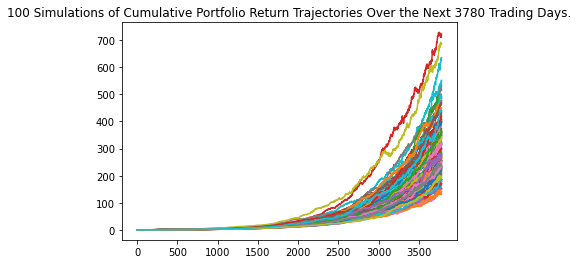

In [39]:
# Plot simulation outcomes
line_plot_Diver_energy_MC_15_years = Diver_energy_MC_15_years.plot_simulation()

# Save the plot for future usage
line_plot_Diver_energy_MC_15_years.get_figure().savefig("Diver_energy_MC_15_years_sim_plot.png", bbox_inches="tight")

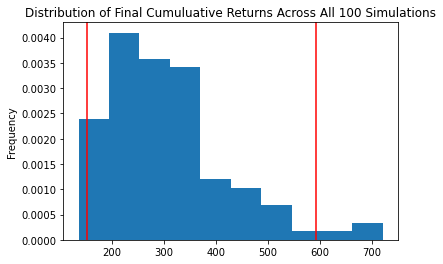

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_Diver_energy_MC_15_years = Diver_energy_MC_15_years.plot_distribution()

# Save the plot for future usage
dist_plot_Diver_energy_MC_15_years.get_figure().savefig('Diver_energy_MC_15_years_dist_plot.png',bbox_inches='tight')

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbldiv3 = Diver_energy_MC_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbldiv3)

count           100.000000
mean            305.079117
std             116.363575
min             135.183067
25%             227.716554
50%             272.633960
75%             361.011681
max             721.193903
95% CI Lower    151.621537
95% CI Upper    592.371279
Name: 3780, dtype: float64


In [42]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TraditionalEnergy Portfolio
ci_Diver_energy_MC_15_years_lower = round(tbldiv3[8]*10000,2)
ci_Diver_energy_MC_15_years_upper = round(tbldiv3[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_Diver_energy_MC_15_years_lower} and ${ci_Diver_energy_MC_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $1516215.37 and $5923712.79


#### WEIGHTED BY Dividend Yield

In [43]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns WEIGHTED BY Dividend Yield
Diver_energy_DY_15_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.06, 0.19, 0.12, 0.10, 0.44, 0.09],
    num_simulation = 100,
    num_trading_days = 252*15)

In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Diver_energy_DY_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001230,0.990336,1.011785,0.993526,0.997039,1.005561,1.001055,0.994506,0.996216,0.999271,...,1.004329,0.996389,1.006200,0.989646,1.005044,1.004190,1.006679,0.998060,1.007110,1.010830
2,1.016336,0.981640,1.023732,0.979882,0.995622,1.007635,0.995727,0.998777,1.008502,1.000766,...,0.995111,1.008588,1.017327,0.991643,1.014505,1.006047,1.003056,0.998251,1.006013,1.003187
3,1.021351,0.979958,1.028718,0.989155,1.005668,1.005066,0.994497,0.988324,1.003583,0.995336,...,1.009916,1.014648,1.012522,1.004461,1.016703,1.011341,1.003966,0.993531,1.005237,1.006942
4,1.032460,0.989176,1.015786,0.981352,1.000885,1.008754,1.010995,0.998956,1.016534,1.000652,...,1.007833,1.017973,1.008500,0.993818,1.017156,1.013444,1.008897,0.990750,1.014876,1.017024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,209.822767,187.344149,265.005969,143.991251,105.318370,301.370932,241.492051,121.774237,241.767008,118.373753,...,197.928344,277.532733,438.401593,319.645117,146.584046,424.324634,541.243960,200.542296,219.378101,341.335515
3777,212.521161,186.146372,261.274001,144.399714,104.901122,301.250722,244.097289,121.428524,242.838095,117.634961,...,198.271557,279.866465,440.335909,322.454888,147.235678,430.033858,537.584362,200.384087,218.688131,339.325285
3778,213.275536,186.989262,262.258503,144.758404,104.719634,300.477415,245.354087,121.959269,242.861430,118.184936,...,198.143332,282.531580,438.709807,321.731900,147.269281,429.259017,535.199655,199.645024,218.929046,342.225121
3779,213.097415,186.854555,262.438000,144.023471,103.507303,304.447404,241.854122,121.794086,241.624474,119.138354,...,198.149668,285.332151,439.803353,320.197777,148.521284,430.972528,536.601769,198.985310,218.113361,343.464149


In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3divDY = Diver_energy_DY_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl3divDY)

count           100.000000
mean            244.411586
std             115.637817
min              95.690911
25%             162.180902
50%             219.483434
75%             307.007437
max             813.932135
95% CI Lower    111.351848
95% CI Upper    523.231948
Name: 3780, dtype: float64


In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_DY_15_years_lower = round(tbl3divDY[8]*10000,2)
ci_Diver_energy_DY_15_years_upper = round(tbl3divDY[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_Diver_energy_DY_15_years_lower} and ${ci_Diver_energy_DY_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $1113518.48 and $5232319.48


#### WEIGHTED BY 15 years Return

In [47]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns WEIGHTED BY 10 years Return
Diver_energy_Ret_15_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [0.20, 0.08, 0.15, 0.23, 0.19, 0.15],
    num_simulation = 100,
    num_trading_days = 252*15)

In [48]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Diver_energy_Ret_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002124,0.998681,1.001422,0.993715,1.015679,1.007088,0.997874,0.999388,0.995563,1.000616,...,0.996646,1.000148,1.005061,1.005313,1.007161,1.004837,0.987568,0.999238,0.994257,1.007954
2,1.002822,1.006699,1.008150,0.997631,1.019015,1.010935,0.998128,1.003802,1.007967,1.007885,...,0.998371,1.002797,1.011409,1.021598,1.014339,1.006478,0.992468,0.998632,0.990898,0.997700
3,1.008972,1.009446,1.015930,1.002344,1.014323,1.018108,1.003756,0.997092,1.005373,1.003323,...,0.991527,0.997950,1.010567,1.020967,1.013392,1.006403,0.994570,1.002337,1.002324,1.004122
4,1.016865,0.998785,1.021010,0.989486,1.021439,1.022616,1.002717,0.994892,1.010155,1.000824,...,0.996238,1.000735,1.009177,1.024623,1.022639,1.005945,1.002415,0.994882,0.996408,1.006097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,230.600907,437.750293,341.901299,296.173307,496.517648,141.328340,574.007969,265.878635,296.518041,155.879925,...,247.577861,421.538175,170.308284,373.553127,268.549586,264.356355,319.671286,146.508916,122.848394,251.622013
3777,230.636574,436.839122,342.565116,297.614238,494.803507,141.979180,576.959549,268.139206,297.892917,155.598850,...,248.914165,419.123744,169.826521,376.326096,267.798365,263.800317,322.858572,146.981093,123.108268,252.245270
3778,231.182536,436.023740,340.848997,300.733041,496.923376,142.511586,575.765821,268.310983,296.715639,156.252285,...,248.225109,417.339517,170.377038,375.704737,269.829495,262.997117,322.067708,147.032411,122.722544,252.097492
3779,232.060939,436.134578,342.609529,301.395319,498.651433,142.788556,581.920118,270.318873,298.954999,156.481710,...,247.705455,418.464826,171.327583,375.436698,271.450092,263.964054,322.886544,147.894441,123.326833,250.807253


In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3divRet = Diver_energy_Ret_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl3divRet)

count           100.000000
mean            285.519290
std             107.973008
min             123.346863
25%             207.920715
50%             268.363318
75%             338.247351
max             669.116207
95% CI Lower    138.591325
95% CI Upper    501.831099
Name: 3780, dtype: float64


In [50]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Traditional Energy Portfolio
ci_Diver_energy_Ret_15_years_lower = round(tbl3divRet[8]*10000,2)
ci_Diver_energy_Ret_15_years_upper = round(tbl3divRet[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_Diver_energy_Ret_15_years_lower} and ${ci_Diver_energy_Ret_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $1385913.25 and $5018310.99


### Simulate 5, 10 and 15 years portfolio growth using Monte Carlo simulation, weighted iqualy

#### MonteCarlo 10 Years simulation

In [51]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns 
Diver_energy_10_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    num_simulation = 100,
    num_trading_days = 252*10)

In [52]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
Diver_energy_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005428,1.005627,1.003706,1.006588,0.987966,0.996170,0.989804,1.003001,1.001683,1.004732,...,0.990864,1.003873,1.009322,1.002812,0.995306,0.991384,1.009654,1.008845,1.001399,0.992948
2,1.003694,1.009584,1.004560,1.007902,0.991512,0.990570,0.985437,1.000603,1.005013,1.012960,...,1.002494,1.010729,1.007658,1.002637,0.999749,0.986728,1.015521,1.019913,1.003774,0.994403
3,1.006430,1.003122,1.007688,1.002270,0.991712,0.996782,0.989084,0.999327,1.004706,1.010686,...,1.002405,1.006779,1.017166,1.002633,0.997102,1.000261,1.005720,1.031044,1.001446,1.001722
4,1.008850,1.009352,1.014709,1.010530,0.990866,1.004615,0.998777,1.002052,0.996690,1.019232,...,1.006583,1.007832,1.013325,0.993983,1.004213,1.004706,1.005945,1.035390,1.005272,0.989649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,98.068124,61.346734,55.993350,76.127969,49.419201,53.071239,34.670942,60.416299,46.139860,24.422573,...,99.873782,53.321186,50.834591,50.474719,31.995950,81.418624,53.653052,57.090966,40.331972,82.667873
2517,97.953823,61.461576,55.804865,75.532362,49.440575,53.256832,34.352449,60.234946,46.328149,24.337799,...,99.648710,53.503464,51.327125,50.581077,31.801189,81.543641,53.915068,56.953369,40.797870,82.384584
2518,97.367519,61.088801,55.708612,75.836198,48.584687,53.039882,34.082151,60.702141,46.336853,24.399066,...,100.026446,53.841410,51.193214,50.411328,32.258866,82.096844,53.458653,56.079164,40.665734,82.110790
2519,96.274173,61.242817,56.036374,76.169215,48.973056,53.692221,33.676817,60.307235,46.109446,24.404561,...,101.244995,54.109299,52.229310,50.553681,32.104212,81.873785,53.469221,56.213633,40.123395,81.480796


In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1divTE = Diver_energy_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1divTE)

count           100.000000
mean             56.863088
std              18.392126
min              21.936849
25%              45.811433
50%              54.874348
75%              65.342318
max             102.223062
95% CI Lower     25.769724
95% CI Upper     97.364253
Name: 2520, dtype: float64


In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_Diver_energy_10_years_lower = round(tbl_1divTE[8]*10000,2)
ci_Diver_energy_10_years_upper = round(tbl_1divTE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_Diver_energy_10_years_lower} and ${ci_Diver_energy_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $257697.24 and $973642.53


#### MonteCarlo 5 Years simulation

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns 
Diver_energy_5_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    num_simulation = 100,
    num_trading_days = 252*5)

In [56]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
Diver_energy_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996820,0.996449,0.995820,0.996044,0.997260,1.005332,1.002924,0.998385,0.994503,1.002659,...,1.003560,1.003086,1.002345,0.993632,1.008809,1.005516,0.991931,1.008713,0.996736,0.997699
2,0.995470,0.981707,1.002817,0.995691,1.004244,1.003244,1.009468,0.999416,0.999756,1.003159,...,1.016537,1.003605,0.996246,0.996565,0.996216,1.007641,0.991085,1.007730,1.002680,0.997408
3,0.999296,0.979481,1.007600,1.014796,1.002198,1.007527,1.011531,1.004136,1.014032,1.000882,...,1.019746,1.012737,0.990963,0.987112,0.996584,1.014903,0.991104,1.005673,1.009770,0.991144
4,0.995027,0.984528,1.012327,1.011240,1.002848,1.007279,1.018187,1.008909,1.013936,1.004280,...,1.013549,1.012457,0.985992,0.977961,0.992336,1.018919,0.997574,1.015730,1.006376,0.992788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,8.048483,9.616142,5.853679,5.888770,8.168091,7.362529,4.980642,6.827099,6.662373,6.050422,...,5.842747,6.931820,9.597522,6.173905,8.307091,5.997757,11.134561,10.676270,6.157895,6.313789
1257,8.132404,9.556787,5.892850,5.940882,8.119524,7.417752,4.958407,6.856747,6.718875,6.080019,...,5.819098,6.919198,9.665787,6.228361,8.286654,6.049734,11.207661,10.731405,6.170671,6.346896
1258,8.173969,9.571398,5.950234,5.928446,8.137103,7.509307,4.996356,6.900928,6.691413,6.134084,...,5.801800,6.953941,9.649941,6.218685,8.341507,6.085510,11.130110,10.794827,6.204357,6.364520
1259,8.243021,9.556898,5.943437,5.907693,8.224632,7.528952,5.024827,6.831126,6.755806,6.091310,...,5.741608,6.928456,9.727812,6.205156,8.297864,6.117215,11.151316,10.683892,6.199799,6.404206


In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2divTE = Diver_energy_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2divTE)

count           100.000000
mean              7.218223
std               1.624165
min               4.375167
25%               5.930288
50%               7.201624
75%               8.143662
max              12.019276
95% CI Lower      4.824260
95% CI Upper     10.942233
Name: 1260, dtype: float64


In [58]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_Diver_energy_5_years_lower = round(tbl_2divTE[8]*10000,2)
ci_Diver_energy_5_years_upper = round(tbl_2divTE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_Diver_energy_5_years_lower} and ${ci_Diver_energy_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $48242.6 and $109422.33


#### MonteCarlo 15 Years simulation

In [59]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns 
Diver_energy_15_years = MCSimulation(
    portfolio_data = Diver_energy,
    weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    num_simulation = 100,
    num_trading_days = 252*15)

In [60]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
Diver_energy_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003470,1.001224,1.006556,1.007139,1.010719,0.997106,0.991602,1.006824,1.007489,0.992145,...,0.996137,1.002358,1.004658,1.004019,0.989044,0.993838,0.991478,0.997116,1.003141,1.008056
2,1.011368,1.001615,1.006341,1.012893,1.018032,1.002639,0.990743,1.009640,1.014728,0.989643,...,1.005049,1.020868,1.001877,0.998571,0.998912,0.996726,0.995651,0.995732,1.002040,0.995185
3,1.017087,1.009434,1.014652,1.005674,1.003776,1.012154,0.991457,1.014881,1.010573,0.992819,...,1.002199,1.020240,1.006542,1.003638,1.012826,0.999089,1.000105,0.996676,1.004308,0.998237
4,1.019041,1.010270,1.015755,1.022551,1.000813,1.012073,0.980712,1.027027,0.997524,0.994326,...,0.996354,1.023930,1.009497,1.018781,1.015554,0.998114,1.008688,1.004175,0.995509,0.998465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,435.060810,314.043750,527.866355,489.488345,134.682501,143.254140,424.970898,360.018788,591.977668,464.277388,...,534.482239,165.488274,456.578020,576.580095,466.558361,352.613650,243.569969,361.013968,497.637787,356.885075
3777,437.835347,312.467877,529.778793,490.283740,135.040082,143.611165,430.127772,361.825689,593.752831,464.718740,...,537.775029,166.072477,456.381517,573.748155,468.516749,351.809808,243.971777,357.121360,496.494897,357.119552
3778,437.093402,312.542516,533.436195,496.366110,134.798675,144.072897,429.469789,361.832206,597.483944,466.388612,...,538.486175,166.695252,453.425883,573.618820,469.370213,352.693808,243.911419,356.440046,492.354936,361.314348
3779,442.018380,309.493823,535.824645,498.808254,134.317393,145.291346,424.942737,362.932987,597.914418,466.721957,...,538.318022,169.544263,452.162338,572.442262,468.269124,351.927130,244.941344,355.994767,497.749782,359.726637


In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3divTE = Diver_energy_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3divTE)

count           100.000000
mean            393.786255
std             131.208121
min             133.094294
25%             302.610208
50%             384.424897
75%             459.852560
max             800.466185
95% CI Lower    176.831326
95% CI Upper    648.330095
Name: 3780, dtype: float64


In [62]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_Diver_energy_15_years_lower = round(tbl_3divTE[8]*10000,2)
ci_Diver_energy_15_years_upper = round(tbl_3divTE[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_Diver_energy_15_years_lower} and ${ci_Diver_energy_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $1768313.26 and $6483300.95


### S&P 500 Simulate 5, 10 and 15 years portfolio growth using Monte Carlo simulation, weighted iqualy

In [63]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['SPY']

# Get 10 year's worth of historical price data 
SPY = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
SPY.head()

SPY                                     
                             open      high     low   close     volume
time                                                                  
2019-08-09 00:00:00-04:00  292.58  293.2400  289.65  291.59   79060953
2019-08-12 00:00:00-04:00  289.96  291.6052  287.02  288.10   55499992
2019-08-13 00:00:00-04:00  287.74  294.1500  287.36  292.43   82355835
2019-08-14 00:00:00-04:00  288.07  292.4644  283.76  283.92  114406673
2019-08-15 00:00:00-04:00  284.88  285.6400  282.39  284.69   82311442

In [64]:
SPY.isnull().sum()

SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [65]:
SPY.dropna()

SPY                                     
                             open      high     low   close     volume
time                                                                  
2019-08-09 00:00:00-04:00  292.58  293.2400  289.65  291.59   79060953
2019-08-12 00:00:00-04:00  289.96  291.6052  287.02  288.10   55499992
2019-08-13 00:00:00-04:00  287.74  294.1500  287.36  292.43   82355835
2019-08-14 00:00:00-04:00  288.07  292.4644  283.76  283.92  114406673
2019-08-15 00:00:00-04:00  284.88  285.6400  282.39  284.69   82311442
...                           ...       ...     ...     ...        ...
2019-12-24 00:00:00-05:00  321.47  321.5200  320.90  321.26   16067681
2019-12-26 00:00:00-05:00  321.65  322.9300  321.64  322.91   27114092
2019-12-27 00:00:00-05:00  323.74  323.8000  322.28  322.86   35123062
2019-12-30 00:00:00-05:00  322.95  323.1000  320.55  321.10   41848090
2019-12-31 00:00:00-05:00  320.53  322.1300  320.15  321.89   38134256

[100 rows x 5 columns]

#### MonteCarlo 10 Years simulation

In [66]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns 
SPY_10_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*10)

In [67]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003520,0.995108,0.991891,1.008299,1.003063,1.002100,1.009770,1.009822,0.993907,0.993721,...,0.998201,1.001464,1.014504,0.988916,1.001185,0.990030,0.986173,1.003661,1.005264,1.001730
2,1.003977,0.991314,1.001456,1.008530,1.000155,1.008575,1.012333,1.011367,0.985484,0.986418,...,0.981364,1.007033,1.006504,0.996604,0.995455,0.980158,0.982396,1.003766,1.004132,1.010922
3,1.017165,0.996401,1.004090,1.012235,1.003052,1.014027,1.009485,1.009717,0.990396,0.996827,...,0.971443,1.001311,1.008891,0.998306,0.989401,0.987095,0.977616,1.005029,1.017615,1.008340
4,1.025043,0.996583,1.006613,1.028318,1.002821,1.021438,1.019123,1.015326,1.004414,0.986723,...,0.977813,1.009658,1.006965,1.000544,0.979988,0.975245,0.969309,1.003659,1.023761,1.009507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,12.219653,9.965171,10.535549,13.438945,10.543688,6.942829,14.973866,8.705587,15.737920,12.639746,...,13.054929,5.644743,11.737098,15.462430,9.900500,15.159580,9.357407,17.383081,20.543809,11.273414
2517,12.295149,10.013593,10.557231,13.512789,10.529386,6.957173,14.962755,8.604315,15.829970,12.542919,...,13.154927,5.684407,11.747915,15.784600,9.852087,15.160501,9.242122,17.453892,20.353890,11.088583
2518,12.303618,9.861805,10.466594,13.670101,10.594208,6.984803,14.946948,8.664520,15.824386,12.474853,...,13.291839,5.680937,11.895405,15.842383,9.874288,15.365087,9.296088,17.383475,20.493396,11.274856
2519,12.230455,10.016827,10.531608,13.762594,10.630601,6.974996,14.885379,8.619489,16.300189,12.614991,...,13.392489,5.648666,11.760111,15.996632,9.913636,15.442842,9.471588,17.207036,20.529331,11.396154


In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1SPY_10_years = SPY_10_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_1SPY_10_years)

count           100.000000
mean             13.841840
std               5.129979
min               5.318119
25%              10.337773
50%              13.118439
75%              16.283051
max              32.601794
95% CI Lower      5.832245
95% CI Upper     26.329239
Name: 2520, dtype: float64


In [69]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_10_years_lower = round(tbl_1SPY_10_years[8]*10000,2)
ci_SPY_10_years_upper = round(tbl_1SPY_10_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_SPY_10_years_lower} and ${ci_SPY_10_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $58322.45 and $263292.39


#### MonteCarlo 5 Years simulation

In [70]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns 
SPY_5_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*5)

In [71]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998398,1.003400,0.993095,1.003228,0.983570,0.997794,0.996061,1.006249,1.006859,0.998454,...,1.005908,0.999111,1.010360,0.990753,1.001733,1.002261,0.996154,1.015275,1.011537,0.992771
2,0.991817,1.015884,0.995174,1.011192,0.986599,1.001950,0.992338,1.011269,0.997806,0.997479,...,1.003050,0.992549,1.010906,0.997694,0.989258,1.003381,1.000960,1.018994,0.994087,0.989780
3,0.985248,1.009042,0.986421,1.013823,0.996115,0.991707,1.000794,1.002230,0.988863,0.986667,...,1.001873,0.979050,1.006854,1.002720,1.001027,1.002866,0.998926,1.013204,0.986793,0.995172
4,0.985255,1.003015,0.979028,1.009785,0.983127,1.000431,0.996579,1.007671,0.980812,0.992039,...,1.001070,1.003111,1.018154,1.004188,0.989396,1.007564,0.990753,1.019626,1.002020,0.997520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.720688,2.747743,3.256564,3.886783,2.249881,6.506524,3.145314,3.095072,4.593985,2.718205,...,2.602291,3.869718,2.954866,3.321489,3.245879,5.576841,4.253446,4.023852,3.369075,4.218697
1257,4.725860,2.764162,3.226342,3.850712,2.256074,6.588019,3.125828,3.096370,4.591879,2.724445,...,2.603793,3.821676,2.950133,3.312474,3.260691,5.601377,4.243813,4.069403,3.384024,4.161111
1258,4.744742,2.757567,3.260613,3.893242,2.235729,6.563629,3.115249,3.151181,4.572882,2.703052,...,2.609993,3.861127,2.924163,3.294110,3.234700,5.602380,4.235431,4.100184,3.410423,4.206088
1259,4.815459,2.744193,3.283915,3.874592,2.239114,6.501805,3.124169,3.147660,4.581067,2.718515,...,2.611445,3.878456,2.900264,3.296960,3.239836,5.650416,4.228050,4.087470,3.438563,4.182073


In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2SPY_5_years = SPY_5_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_2SPY_5_years)

count           100.000000
mean              3.626823
std               0.994965
min               1.656443
25%               2.976171
50%               3.477578
75%               4.182808
max               6.918854
95% CI Lower      2.251560
95% CI Upper      6.442463
Name: 1260, dtype: float64


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_5_years_lower = round(tbl_2SPY_5_years[8]*10000,2)
ci_SPY_5_years_upper = round(tbl_2SPY_5_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_SPY_5_years_lower} and ${ci_SPY_5_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $22515.6 and $64424.63


#### MonteCarlo 15 Years simulation

In [74]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns 
SPY_15_years = MCSimulation(
    portfolio_data = SPY,
    num_simulation = 100,
    num_trading_days = 252*15)

In [75]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
SPY_15_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000006,1.006373,1.014361,1.011293,1.005985,1.006924,1.006681,1.015121,1.004797,1.000533,...,1.005860,0.997477,0.997922,1.004756,1.009255,1.001474,1.009432,1.005994,1.004191,0.985106
2,1.000645,1.013779,1.015655,1.009097,1.010170,1.011387,0.998128,1.013281,1.010381,0.998089,...,0.999069,1.001031,0.996543,1.011423,1.008815,1.004755,1.001230,1.016184,0.994676,0.985231
3,0.997756,1.007654,1.027767,1.003506,1.006277,1.009231,0.998059,1.032869,1.012297,0.993375,...,1.001213,1.009747,0.992391,1.015376,1.005996,0.987534,0.994909,1.013340,0.991120,0.980379
4,0.997490,1.008717,1.023989,1.020968,1.011438,1.010936,1.005110,1.047159,1.012156,0.984773,...,0.990346,1.017897,0.988847,1.009087,1.017619,0.989213,1.001071,1.018326,0.994040,0.981986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,24.369516,58.385850,79.738819,22.886046,57.456346,35.664347,45.517292,64.821420,82.655701,46.465056,...,66.290117,24.011069,51.103734,19.201322,70.183467,25.757217,33.352022,47.485728,52.106824,37.402011
3777,23.922521,58.459418,79.707946,22.946696,57.523276,35.758069,45.687994,65.447936,82.958458,46.655701,...,65.443910,24.065640,51.588279,19.291283,69.888822,26.098231,33.262173,47.605698,52.117860,37.401766
3778,23.973173,58.860599,79.228690,22.792896,57.276980,35.605001,45.760048,65.649418,83.071195,46.406696,...,66.015793,23.764136,52.186319,19.349426,70.052045,25.859161,32.785207,47.824765,51.916533,37.094646
3779,24.428692,60.151564,78.673991,22.897616,57.064269,35.835467,45.659106,65.512834,83.252365,46.837819,...,66.910611,24.026040,52.013390,19.512372,69.423345,25.871832,33.303032,48.137401,52.042898,37.085547


In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3SPY_15_years = SPY_15_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_3SPY_15_years)

count           100.000000
mean             47.693516
std              21.697430
min              14.816656
25%              31.838404
50%              44.930557
75%              54.460268
max             136.048990
95% CI Lower     18.751902
95% CI Upper     98.302876
Name: 3780, dtype: float64


In [77]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments Alternative RE POrtfolio stocks
ci_SPY_15_years_lower = round(tbl_3SPY_15_years[8]*10000,2)
ci_SPY_15_years_upper = round(tbl_3SPY_15_years[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_SPY_15_years_lower} and ${ci_SPY_15_years_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 15 years will end within in the range of $187519.02 and $983028.76


# Summary

#### The Monte Carlo forecast brings a Lover and Upper 95% confidence intervals showing the possible outcomes for an initial investment of USD:10,000 in The Alternative Renewable Energy Portfolio, here you can find 3 sentive models base on Market Capita, Equally Weightened, Dividend Yield and 10 Years Return, in different lapses:

## 5 / 10 / 15 Years Forecast **Traditional Energy Stocks**

In [78]:
print(f" ** MonteCarlo simulation S&P500")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_SPY_5_years_lower}      and    95% confidence intervals Upper (5 Years) = ${ci_SPY_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_SPY_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_SPY_10_years_upper}")  
print(f" 95% confidence intervals Lower (15 Years) = ${ci_SPY_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_SPY_15_years_upper}")
print()
print()
print(f" ** Monte Carlo simulation weighted Iqualy       This scenarios have the best Cumulated Returns Predictions" )
print()
print(f"          95% confidence intervals Lower (5 Years) = ${ci_Diver_energy_5_years_lower}      and    95% confidence intervals Upper (5 Years) = ${ci_Diver_energy_5_years_upper}")  
print(f"          95% confidence intervals Lower (10 Years) = ${ci_Diver_energy_10_years_lower}     and    95% confidence intervals Upper (10 Years) = ${ci_Diver_energy_10_years_upper}")  
print(f"          95% confidence intervals Lower (15 Years) = ${ci_Diver_energy_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_Diver_energy_15_years_upper}")
print()
print(f" ** Monte Carlo simulation weighted by Stock Market Capital")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_Diver_energy_MC_5_years_lower}    and    95% confidence intervals Upper (5 Years) = ${ci_Diver_energy_MC_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_Diver_energy_MC_10_years_lower}    and    95% confidence intervals Upper (10 Years) = ${ci_Diver_energy_MC_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_Diver_energy_MC_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_Diver_energy_MC_15_years_upper}")
print()
print()
print(f" ** Monte Carlo simulation weighted by Stock Dividend Yield")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_Diver_energy_DY_5_years_lower}     and    95% confidence intervals Upper (5 Years) = ${ci_Diver_energy_DY_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_Diver_energy_DY_10_years_lower}    and    95% confidence intervals Upper (10 Years) = ${ci_Diver_energy_DY_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_Diver_energy_DY_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_Diver_energy_DY_15_years_upper}")
print()
print()
print(f" ** Monte Carlo simulation weighted by Stock 10 years Cumulated Return")
print()
print(f" 95% confidence intervals Lower (5 Years) = ${ci_Diver_energy_Ret_5_years_lower}     and    95% confidence intervals Upper (5 Years) = ${ci_Diver_energy_Ret_5_years_upper}")  
print(f" 95% confidence intervals Lower (10 Years) = ${ci_Diver_energy_Ret_10_years_lower}    and    95% confidence intervals Upper (10 Years) = ${ci_Diver_energy_Ret_10_years_upper}")
print(f" 95% confidence intervals Lower (15 Years) = ${ci_Diver_energy_Ret_15_years_lower}    and    95% confidence intervals Upper (15 Years) = ${ci_Diver_energy_Ret_15_years_upper}")

 ** MonteCarlo simulation S&P500

 95% confidence intervals Lower (5 Years) = $22515.6      and    95% confidence intervals Upper (5 Years) = $64424.63
 95% confidence intervals Lower (10 Years) = $58322.45     and    95% confidence intervals Upper (10 Years) = $263292.39
 95% confidence intervals Lower (15 Years) = $187519.02    and    95% confidence intervals Upper (15 Years) = $983028.76


 ** Monte Carlo simulation weighted Iqualy       This scenarios have the best Cumulated Returns Predictions

          95% confidence intervals Lower (5 Years) = $48242.6      and    95% confidence intervals Upper (5 Years) = $109422.33
          95% confidence intervals Lower (10 Years) = $257697.24     and    95% confidence intervals Upper (10 Years) = $973642.53
          95% confidence intervals Lower (15 Years) = $1768313.26    and    95% confidence intervals Upper (15 Years) = $6483300.95

 ** Monte Carlo simulation weighted by Stock Market Capital

 95% confidence intervals Lower (5 Years) 

In [79]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
map_box_api = os.getenv("mapbox")

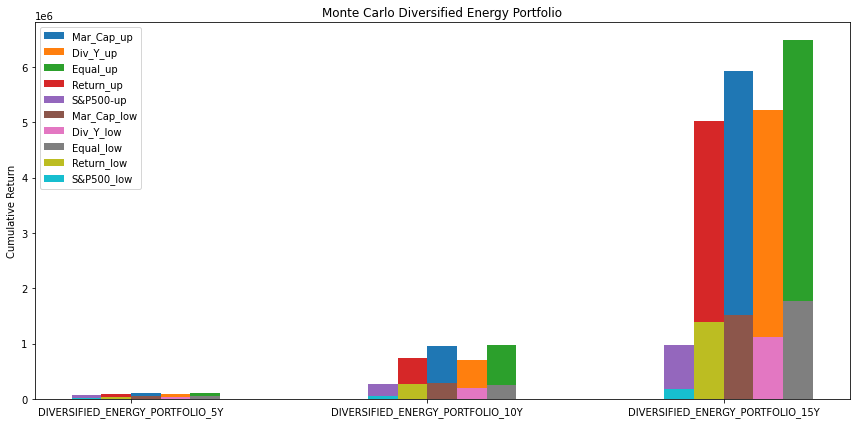

In [82]:
 
labels = ['DIVERSIFIED_ENERGY_PORTFOLIO_5Y', 'DIVERSIFIED_ENERGY_PORTFOLIO_10Y', 'DIVERSIFIED_ENERGY_PORTFOLIO_15Y']
Mar_Cap_up =[ci_Diver_energy_MC_5_years_upper, ci_Diver_energy_MC_10_years_upper, ci_Diver_energy_MC_15_years_upper]
Mar_Cap_low =[ci_Diver_energy_MC_5_years_lower, ci_Diver_energy_MC_10_years_lower, ci_Diver_energy_MC_15_years_lower]
Div_Y_up=[ci_Diver_energy_DY_5_years_upper, ci_Diver_energy_DY_10_years_upper, ci_Diver_energy_DY_15_years_upper]
Div_Y_low=[ci_Diver_energy_DY_5_years_lower, ci_Diver_energy_DY_10_years_lower, ci_Diver_energy_DY_15_years_lower]
Equal_up=[ci_Diver_energy_5_years_upper,ci_Diver_energy_10_years_upper,ci_Diver_energy_15_years_upper]
Equal_low=[ci_Diver_energy_5_years_lower, ci_Diver_energy_10_years_lower,ci_Diver_energy_15_years_lower]
Return_up=[ci_Diver_energy_Ret_5_years_upper, ci_Diver_energy_Ret_10_years_upper, ci_Diver_energy_Ret_15_years_upper]
Return_low=[ci_Diver_energy_Ret_5_years_lower, ci_Diver_energy_Ret_10_years_lower, ci_Diver_energy_Ret_15_years_lower]
spy_up=[ci_SPY_5_years_upper, ci_SPY_10_years_upper, ci_SPY_15_years_upper ]
spy_low=[ci_SPY_5_years_lower, ci_SPY_10_years_lower, ci_SPY_15_years_lower] 
 

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x + width/2,Mar_Cap_up, width, label='Mar_Cap_up') 
rects2 = ax.bar(x + width*1.5, Div_Y_up, width, label='Div_Y_up')
rects3 = ax.bar(x + width*2.5, Equal_up, width, label='Equal_up')
rects4 = ax.bar(x - width/2, Return_up, width, label='Return_up')
rects5 = ax.bar(x - width*1.5, spy_up, width, label='S&P500-up')
rects6 = ax.bar(x + width/2,Mar_Cap_low, width, label='Mar_Cap_low') 
rects7 = ax.bar(x + width*1.5, Div_Y_low, width, label='Div_Y_low')
rects8 = ax.bar(x + width*2.5, Equal_low, width, label='Equal_low')
rects9 = ax.bar(x - width/2, Return_low, width, label='Return_low')
rects10 = ax.bar(x - width*1.5, spy_low, width, label='S&P500_low')






# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative Return')
ax.set_title('Monte Carlo Diversified Energy Portfolio')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()